## Preprocessing

In [4]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=["EIN", "NAME"], inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
# Determine the number of unique values in each column.
unique_values = application_df.nunique()
print(unique_values)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [7]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df["APPLICATION_TYPE"].value_counts()
print(application_type_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_type_counts[application_type_counts < 950].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: count, dtype: int64

In [10]:
# Look at CLASSIFICATION value counts for binning
classification_value_counts = application_df["CLASSIFICATION"].value_counts()
print(classification_value_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [11]:
# You may find it helpful to look at CLASSIFICATION value counts >1
print(classification_value_counts[classification_value_counts>1])

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [12]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_value_counts[classification_value_counts < 1882].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_encoded = pd.get_dummies(application_df)
application_df_encoded.to_csv('application_data_encoded.csv', index=False)

In [14]:
# Split our preprocessed data into our features and target arrays
features = application_df_encoded.drop(columns=["IS_SUCCESSFUL"])
target = application_df_encoded["IS_SUCCESSFUL"]

print("Features Shape:", features.shape)
print("Target Shape:", target.shape)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training Features Shape:", X_train.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Testing Target Shape:", y_test.shape)

Features Shape: (34299, 40)
Target Shape: (34299,)
Training Features Shape: (27439, 40)
Training Target Shape: (27439,)
Testing Features Shape: (6860, 40)
Testing Target Shape: (6860,)


In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [18]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model - deep neural net
nn_orig = Sequential()

# Number of input features
input_features = len(X_train_scaled[0])

# First hidden layer
nn_orig.add(Dense(units=80, input_dim=input_features, activation='relu'))

# Second hidden layer
nn_orig.add(Dense(units=30, activation='relu'))

# Output layer
nn_orig.add(Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn_orig.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3280      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5741 (22.43 KB)
Trainable params: 5741 (22.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Compile the model
nn_orig.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# Train the model

from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint filepath
checkpoint_filepath = 'model_checkpoint.h5'

# Create a callback to save the model's weights every five epochs
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    save_freq=5 * len(X_train_scaled),  # Save every five epochs (in terms of batches)
)

fit_model = nn_orig.fit(X_train_scaled, y_train, epochs=100, callbacks=[checkpoint_callback])

Epoch 1/100
858/858 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7177
Epoch 2/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5575 - accuracy: 0.7305
Epoch 3/100
858/858 [==============================] - 3s 3ms/step - loss: 0.5544 - accuracy: 0.7309
Epoch 4/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5534 - accuracy: 0.7307
Epoch 5/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5516 - accuracy: 0.7313
Epoch 6/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5510 - accuracy: 0.7328
Epoch 7/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5503 - accuracy: 0.7330
Epoch 8/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5500 - accuracy: 0.7326
Epoch 9/100
858/858 [==============================] - 2s 3ms/step - loss: 0.5487 - accuracy: 0.7338
Epoch 10/100
858/858 [==============================] - 2s 2ms/step - loss: 0.5488 - accura

In [21]:
# Evaluate the model using the test data
orig_model_loss, orig_model_accuracy = nn_orig.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {orig_model_loss}, Accuracy: {orig_model_accuracy}")

215/215 - 1s - loss: 0.5675 - accuracy: 0.7267 - 872ms/epoch - 4ms/step
Loss: 0.5675177574157715, Accuracy: 0.7266764044761658


In [22]:
# Export our model to HDF5 file
file_name = f"AlphabetSoupCharity_Original_{orig_model_accuracy:.4f}.h5"
nn_orig.save(file_name)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


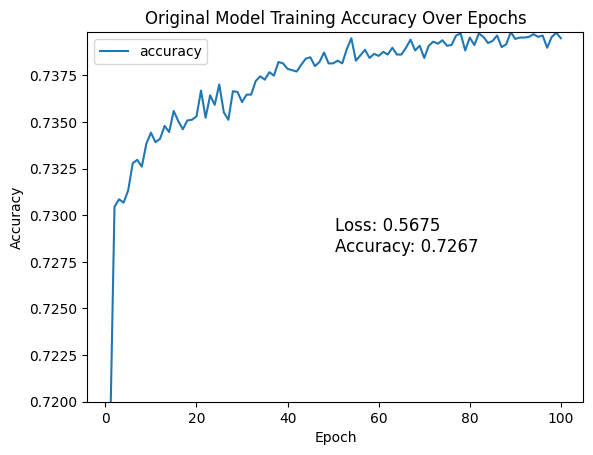

In [24]:
import matplotlib.pyplot as plt

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
ax = history_df.plot(y="accuracy")
ax.set_ylim(0.72, history_df["accuracy"].max())  # Set y-axis limits
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Original Model Training Accuracy Over Epochs')

# Overlay the loss and accuracy values
plt.text(0.5, 0.5, f"Loss: {orig_model_loss:.4f}\nAccuracy: {orig_model_accuracy:.4f}", transform=ax.transAxes,
         fontsize=12, verticalalignment='top')

plt.savefig('AlpahbetSoupCharity_Original_Accuracy.png')
plt.show()